#### Dataset url: https://grouplens.org/datasets/movielens/latest/

<h1 style='color:purple' align='center' >Types of Recommendation Engines </h1> 

### 1. Content-Based

The Content-Based Recommender relies on the similarity of the items being recommended. The basic idea is that if you like an item, then you will also like a “similar” item. It generally works well when it's easy to determine the context/properties of each item.

A content based recommender works with data that the user provides, either explicitly movie ratings for the MovieLens dataset. Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

### 2. Collaborative Filtering
The Collaborative Filtering Recommender is entirely based on the past behavior and not on the context. More specifically, it is based on the similarity in preferences, tastes and choices of two users. It analyses how similar the tastes of one user is to another and makes recommendations on the basis of that.

For instance, if user A likes movies 1, 2, 3 and user B likes movies 2,3,4, then they have similar interests and A should like movie 4 and B should like movie 1. This makes it one of the most commonly used algorithm as it is not dependent on any additional information.

In general, collaborative filtering is the workhorse of recommender engines. The algorithm has a very interesting property of being able to do feature learning on its own, which means that it can start to learn for itself what features to use. It can be divided into Memory-Based Collaborative Filtering and Model-Based Collaborative filtering. In this post, I'll only focus on the Memory-Based Collaborative Filtering technique.



#### Overall, Memory-based Collaborative Filtering is easy to implement and produce reasonable prediction quality. However, there are some drawback of this approach:

-It doesn't address the well-known cold-start problem, that is when new user or new item enters the system.
-It can't deal with sparse data, meaning it's hard to find users that have rated the same items.
-It suffers when new users or items that don't have any ratings enter the system.
-It tends to recommend popular items.

#### Clustering based algorithm (KNN):

The idea of clustering is same as that of memory-based recommendation systems. In memory-based algorithms, we use the similarities between users and/or items and use them as weights to predict a rating for a user and an item. The difference is that the similarities in this approach are calculated based on an unsupervised learning model, rather than Pearson correlation or cosine similarity.

<h1 style= 'color:purple' align=center>Nearest Neighbor item based Collaborative Filtering </h1>

### Import necessary modules and read the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('ratings.csv')

# Reading movies file
movies = pd.read_csv('movies.csv')  

In [2]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
movies = movies.drop_duplicates(subset ="title", keep = False, inplace = False)
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9732 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9732 non-null   int64 
 1   title    9732 non-null   object
 2   genres   9732 non-null   object
dtypes: int64(1), object(2)
memory usage: 304.1+ KB


<h1 style= 'color:purple' align= 'center' >Data Exploration </h1>

### Titles

Are there certain words that feature more often in Movie Titles? I'll attempt to figure this out using a word-cloud visualization.

C:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


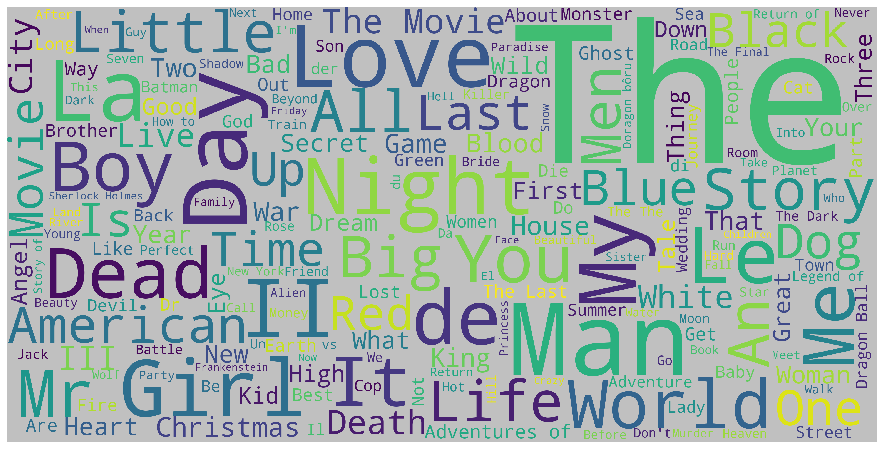

In [7]:
# Import new libraries
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='silver', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

## Genres

The genres variable will surely be important while building the recommendation engines since it describes the content of the film (i.e. Animation, Horror, Sci-Fi). A basic assumption is that films in the same genre should have similar contents. I'll attempt to see exactly which genres are the most popular.

In [8]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 4356],
 ['Comedy', 3753],
 ['Thriller', 1889],
 ['Action', 1826],
 ['Romance', 1592]]

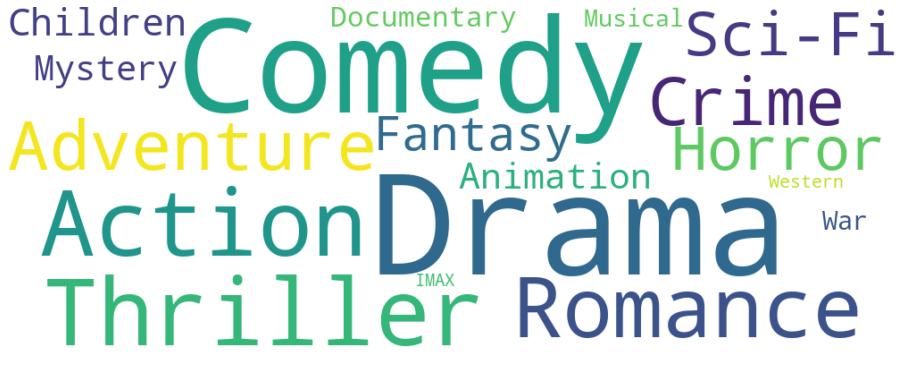

In [9]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Ratings

Next Let's examine the rating further and take a look at its summary statistics and distribution.

In [10]:
# Get summary statistics of rating
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

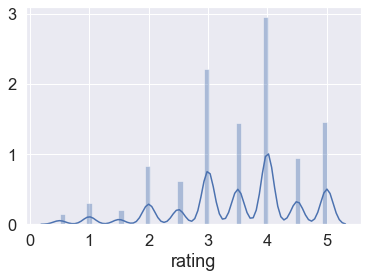

In [11]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

Let's also take a look at a subset of 20 movies with the highest rating.

In [12]:
# Join all 2 files into one dataframe
dataset = pd.merge(ratings, movies, on="movieId")
# Display 20 movies with highest ratings
# dataset[['title','genres','rating']].sort_values('rating', ascending=False).tail(100)
dataset.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [13]:
dataset.shape

(100730, 6)

In [14]:
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head()

,title,genres,rating
50365,Die Hard (1988),Action|Crime|Thriller,5.0
25239,Clueless (1995),Comedy|Romance,5.0
25263,Clueless (1995),Comedy|Romance,5.0
57311,Spotlight (2015),Thriller,5.0
57313,Spotlight (2015),Thriller,5.0


<h1 style='color:purple' align='center' >Feature Engineering </h1> 

In [15]:
dataset2 = dataset.drop(['timestamp', 'genres'], axis = 1)
dataset2.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [16]:
dataset2.shape

(100730, 4)

## Total Number Of Rating 

The rating of a movie is proportional to the total number of ratings it has. Therefore, we will also consider the total ratings cast for each movie.

In [17]:
movie_rating_count = dataset2.groupby('title')['rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['title', 'totalRatingCount']]
movie_rating_count.head(10)

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
5,'Tis the Season for Love (2015),1
6,"'burbs, The (1989)",17
7,'night Mother (1986),1
8,(500) Days of Summer (2009),42
9,*batteries not included (1987),7


In [18]:
movie_rating_count.shape

(9714, 2)

In [19]:
newDataset = dataset2.merge(movie_rating_count, left_on = 'title', right_on = 'title', how='left')
newDataset.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [20]:
newDataset.shape

(100730, 5)

In [21]:
popularity_threshold = 50
rating_popular_movie = newDataset.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215
...,...,...,...,...,...
79160,603,1997,4.0,"Exorcist, The (1973)",53
79161,606,1997,3.0,"Exorcist, The (1973)",53
79162,607,1997,5.0,"Exorcist, The (1973)",53
79163,608,1997,4.5,"Exorcist, The (1973)",53


In [22]:
rating_popular_movie.shape

(41310, 5)

### Creating a list of all movie titles and exporting it into a json file

In [23]:
Movie_title = []
title_col = rating_popular_movie['title'].unique()

for i in title_col:
    Movie_title.append(i)

len(Movie_title)

449

In [24]:
import json
List_of_movies = {
    'Movie_titles' : Movie_title
}
with open("List_of_movies.json","w") as f:
    f.write(json.dumps(List_of_movies))

### Creating a pivot table of movie title and userId

In [25]:
movie_features_df1 = dataset2.pivot(index = 'userId', columns='title', values='rating')
movie_features_df1

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [26]:
movie_features_df1.shape

(610, 9714)

In [27]:
movie_features_df2 = movie_features_df1.dropna(thresh=10, axis=1).fillna(0, axis=1)

In [28]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df2.values)     # Converting to array/sparse matrix

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [29]:
movie_features_df_matrix

<610x2266 sparse matrix of type '<class 'numpy.float64'>'
	with 81021 stored elements in Compressed Sparse Row format>

In [30]:
movie_features_df2.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Get index of a movie title for which user has given the rating

In [31]:
#def get_index_from_title(title):
 #   return movie_features_df.loc[(title)].index

In [32]:
# get_index_from_title("Up (2009)")

### Predicting neighbour movie titles 

In [34]:
query_index = np.random.choice(movie_features_df2.shape[0])
# print(query_index)

#def recommendations(query_index):
    
distances, indices = model_knn.kneighbors(movie_features_df2.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10)
print(indices)   
    

[[218 273 437 238  67 607 479 231 598 379]]


<h1 style='color:purple' align='center' >Collaborative Filtering Recommendation Model </h1>


The content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, I will use Memory-Based Collaborative Filtering to make recommendations to movie users. The technique is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.

### Theory

There are 2 main types of memory-based collaborative filtering algorithms:

#### User-User Collaborative Filtering: 
Here we find look alike users based on similarity and recommend movies which first user’s look-alike has chosen in past. This algorithm is very effective but takes a lot of time and resources. It requires to compute every user pair information which takes time. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.

#### Item-Item Collaborative Filtering:
It is quite similar to previous algorithm, but instead of finding user's look-alike, we try finding movie's look-alike. Once we have movie's look-alike matrix, we can easily recommend alike movies to user who have rated any movie from the dataset. This algorithm is far less resource consuming than user-user collaborative filtering. Hence, for a new user, the algorithm takes far lesser time than user-user collaborate as we don’t need all similarity scores between users. And with fixed number of movies, movie-movie look alike matrix is fixed over time.

In either scenario, we builds a similarity matrix. For user-user collaborative filtering, the user-similarity matrix will consist of some distance metrics that measure the similarity between any two pairs of users. Likewise, the item-similarity matrix will measure the similarity between any two pairs of items.

There are 3 distance similarity metrics that are usually used in collaborative filtering:

#### Jaccard Similarity:

Similarity is based on the number of users which have rated item A and B divided by the number of users who have rated either A or B
It is typically used where we don’t have a numeric rating but just a boolean value like a product being bought or an add being clicked

#### Cosine Similarity: (as in the Content-Based system)

Similarity is the cosine of the angle between the 2 vectors of the item vectors of A and B
Closer the vectors, smaller will be the angle and larger the cosine

#### Pearson Similarity:

Similarity is the pearson coefficient between the two vectors.
For the purpose of diversity, I will use Pearson Similarity in this implementation.



In [35]:
corrMatrix = movie_features_df2.corr(method='pearson')
corrMatrix.head(100)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Almost Famous (2000),0.099554,0.209549,0.032088,0.296727,0.134434,0.118628,0.242958,0.079158,0.005092,0.051279,...,0.244619,0.085395,0.072505,0.221259,0.126008,0.362571,0.011577,0.208008,0.186599,0.147413
Along Came Polly (2004),0.027287,0.282426,0.113213,0.193085,0.162678,0.180259,0.112928,0.121704,0.125792,0.124032,...,0.173133,0.160430,0.029076,0.189165,0.166278,0.309183,0.078468,-0.036498,0.231566,0.025928
Along Came a Spider (2001),0.064762,-0.003205,0.016372,0.085365,-0.018241,0.080388,0.094016,-0.016678,0.079375,-0.028052,...,0.115347,0.093774,0.085286,0.150757,0.052144,0.174489,0.014189,0.025327,0.233244,0.043581


In [43]:
type(corrMatrix)

pandas.core.frame.DataFrame

In [44]:
corrMatrix.to_pickle("./corrMatrix.pkl")

In [45]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    # print(type(similar_ratings))
    return similar_ratings

In [46]:
romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head()

,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,0.157792,2.500000,0.356179,0.684973,0.484900,0.372257,0.355353,0.399389,0.338715,0.500338,...,0.936288,0.446637,0.171018,1.036463,0.889309,0.630565,0.540017,0.134034,0.602730,0.314763
1,-0.016276,0.203998,0.126834,0.113241,0.092218,0.085790,0.072825,0.097794,0.083822,0.084897,...,0.159907,0.085502,0.011564,0.176888,0.168302,0.121710,0.072590,0.025695,0.081764,0.027540
2,-0.304722,-0.062634,-0.214700,-0.118754,-0.037059,-0.063992,-0.170195,-0.280090,-0.016283,-0.102493,...,-0.147339,-0.162387,-0.368712,-0.281119,-0.263686,-0.228562,-0.144292,-0.410899,-0.242935,-0.238410
3,-0.102988,-0.056808,-0.049655,-0.042987,-0.021729,-0.055422,-0.051115,-0.097954,-0.061595,-0.070398,...,-0.075325,-0.048607,-0.128795,-0.175166,-0.098088,-0.074205,-0.049626,-0.153017,-0.082048,-0.091432


In [70]:
similar_movies_final = similar_movies.sum().sort_values(ascending=False).head(20)     # Movies with their similarity score value
similar_movies_final.head()

(500) Days of Summer (2009)       2.584556
Alice in Wonderland (2010)        1.395229
Silver Linings Playbook (2012)    1.254800
Yes Man (2008)                    1.116264
Adventureland (2009)              1.112235
dtype: float64

In [71]:
recommendation = pd.DataFrame(similar_movies_final, columns=['Correlation'])
recommendation2 = recommendation.dropna().reset_index()
recommendation2.head(10) 

,index,Correlation
0,(500) Days of Summer (2009),2.584556
1,Alice in Wonderland (2010),1.395229
2,Silver Linings Playbook (2012),1.254800
3,Yes Man (2008),1.116264
4,Adventureland (2009),1.112235
5,Marley & Me (2008),1.108381
6,About Time (2013),1.102192
7,"Crazy, Stupid, Love. (2011)",1.088757
8,50/50 (2011),1.086517
9,"Help, The (2011)",1.075963


In [75]:
recommendation2.rename(columns= {'index':'title'}, inplace=True)
final_recommendation = recommendation2.head(5)
final_recommendation

,title,Correlation
0,(500) Days of Summer (2009),2.584556
1,Alice in Wonderland (2010),1.395229
2,Silver Linings Playbook (2012),1.254800
3,Yes Man (2008),1.116264
4,Adventureland (2009),1.112235


In [48]:
corr2 = pd.read_pickle("./corrMatrix.pkl")       # Reading corrMatrix pickle file